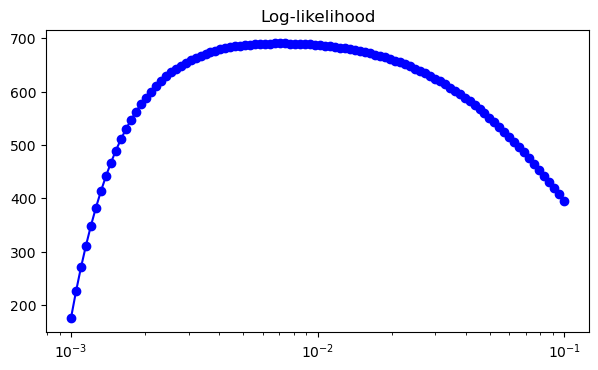

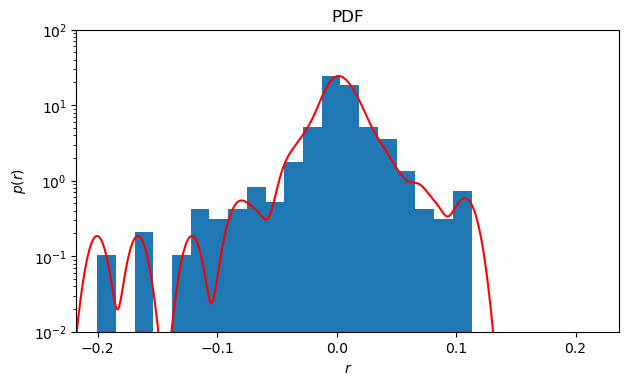

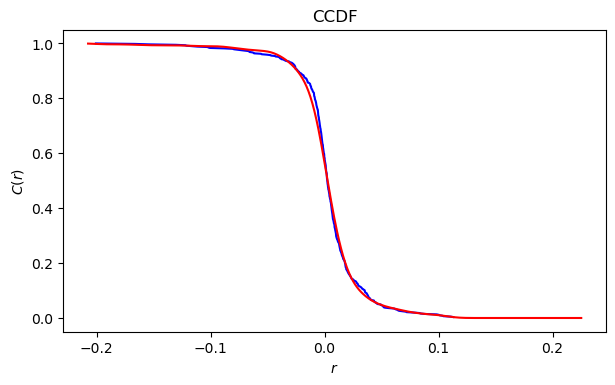

In [47]:
#!/usr/bin/python3.7
#Case_Study2.py
#Parth Parakh
#purpose: Kernel et al with cryptocurrency data

# The file loaded here is a 7x929 matrix where each row corresponds to
# 929 daily returns of a different cryptocurrency, ending in February
# 2018

# Row 1: Bitcoin
# Row 2: Dash
# Row 3: Ethereum
# Row 4: Litecoin
# Row 5: Monero
# Row 6: Nem
# Row 7: Ripple
#---------------------------------------------------------------------
#import modules
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
#----------------------------------------------------------------------
#helper functions

# This function evaluates a normalized sum of N Gaussian functions with
# means specified by the input vector mu and standard deviation equal to
# s. The function is computed in each point of the input vector x.

def gaussian_mix(x,mu,s):
    N = len(mu);
    G = 0;
    for i in range(1,N):   
        G = G + np.exp(-(x-mu[i])**2/(2*(s**2)))/np.sqrt(2*np.pi*(s**2));
    
    G = G/N;
    return G;

def readFile(fileName):
    with open(fileName) as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    return d
        
if __name__ == '__main__':
    file = readFile("cryptocurrency_prices.txt")
    data = (file)
    b = data[0]
    
    #taking log returns
    r = np.zeros((len(b)-1,1))
    for i in range(0,len(b)-1):
        den = float(b[i])
        num = float(b[i+1]);
        r[i] = np.log(num/den);
        
    # Separating the data into training / validation / testing sets (one
    # third of the data each)
    
    pt = 0.33; # Fraction of data to use in training set
    pv = 0.33; # Fraction of data to use in validation set
    
    train_set = r[1:round(pt*len(r))];
    N_T = len(train_set);
    val_set = r[ round(pt*len(r)+1) : round((pt+pv)*len(r)) ];
    test_set = r[round((pt+pv)*len(r))+1:];
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # Maximum-likelihood analysis %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    h = np.logspace(-3,-1,100); # Logarithmic space for parameter h

    L = []; # Empty vector to store all log-likelihood values
    
    for i in range(0,len(h)):
        #Computing log-likelihood for Gaussian kernel evaluated on the
        #validation set (using the training set as fixed parameters
        p = gaussian_mix(val_set,train_set,h[i]); # Vector of Gaussian kernel values calculated in each point of validation set 
        aux = np.sum(np.log(p));
        L = np.append(L,aux);

    index = 0;
    for i in range(0,len(L)):
        if(L[i]==max(L)):
            index = i;
        
    h_opt = h[index]; # Identifying optimal bandwidth value (i.e., argmax of log-likelihood)
    plot1 = plt.figure(1,figsize=(7,4), dpi=100)
    
    plt.plot(h,L,'o-b') # Plotting the log-likelihood
    plt.xscale('log')
    plt.title('Log-likelihood')
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%% Plot of optimal Gaussian kernel vs empirical distribution %%%%%%%%%%%%%
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    #%% Plot of optimal Gaussian kernel distribution's PDF vs histogram of
    #%% training + validation set

    plot2 = plt.figure(2,figsize=(7,4), dpi=100)

    x = np.linspace(min(r)*1.05,max(r)*1.05,1000);
    y = gaussian_mix(x,train_set,h_opt); #Values of kernel density for optimal bandwidth

    plt.plot(x,y,'r')
    
    NB = 20;
    a = np.append(train_set,val_set)
    plt.hist(a,NB,density=True);
    plt.yscale('log')
    plt.xlim([min(x),max(x)])
    plt.ylim([1e-2,100])
    plt.title('PDF')
    plt.xlabel('$r$')
    plt.ylabel('$p(r)$')
    
    
    plot3 = plt.figure(3,figsize=(7,4), dpi=100)
    
    aux = np.sort(a,axis=0);
    
    y = np.array(range(0,len(aux),1));
    y = 1-y/(len(aux)+1);
    
    plt.plot(aux,y,'b')

    x = np.linspace(min(r),max(r),500);
    C = []; # Empty vector to store values of kernel's CCDF

    for i in range(0,len(x)):
        tmp = sum(1-sc.erf((x[i]-train_set)/np.sqrt(2*h_opt**2)))/(2*N_T);
        C = np.append(C,tmp);

    plt.plot(x,C,'r')
    plt.title('CCDF')
    plt.xlabel('$r$')
    plt.ylabel('$C(r)$')
    
    